In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import db
import rand
from detector.subgraph import matching_subgraph

from utils.seeds import gen_seeds
from utils.equatorial import equatorial2vec, vec2equatorial
from utils.interangle import inter_star_angle_vec
from utils.quaternion import convert_z_axis

from utils.font import font_setting

font_setting()

### Parameter

In [2]:
Vmax = 5.5
theta_FOV = 30*np.pi/180
epsillon = 1.0 * (2 ** (-10))
#
n_obs = 10
theta_img = 1.0 * (2 ** (-10))
kappa_alpha = 0.99
kappa_alpha_sampling = 0.999999
# 
seed = 100
seeds = gen_seeds(seed, 2)

### prepair DB

In [3]:
# origne catalog
yale_catalog = catalog.YaleStarCatalog()
# star db
star_db = db.StarDB(
    yale_catalog.get_HR(), yale_catalog.get_RA(),
    yale_catalog.get_DE(), yale_catalog.get_Vmag(), Vmax=Vmax)
I = star_db.get_I()
HR = star_db.get_HR()
RA = star_db.get_RA()
DE = star_db.get_DE()
# pair star db
pairstar_db = db.PairStarDB(
    I, RA, DE, theta_FOV=theta_FOV)

## select stars randomly

In [4]:
def select_ID_observable_stars(n_obs, ID, RA, DE, theta_FOV, seed=100):
    seeds = gen_seeds(seed, 2)
    # select center randomly
    center_vec = rand.uniform_spherical_vector(seed=seeds[0])
    # collect stars in circle (FOV)
    s_vec = equatorial2vec(RA, DE)
    in_circle = inter_star_angle_vec(center_vec, s_vec) < theta_FOV
    ID_in_circle_list = list(ID[in_circle])
    # select stars randomly
    if True:
        return rand.random_select(n_obs, ID_in_circle_list, seed=seeds[1]), center_vec
    return rand.random_select(n_obs, ID_in_circle_list, seed=seeds[1])


# select some stars
IDs_obs_star, center_vec = select_ID_observable_stars(
    n_obs, I, RA, DE, theta_FOV, seed=seeds[0])
s_array = equatorial2vec(RA[IDs_obs_star], DE[IDs_obs_star])
s_list = list(s_array)

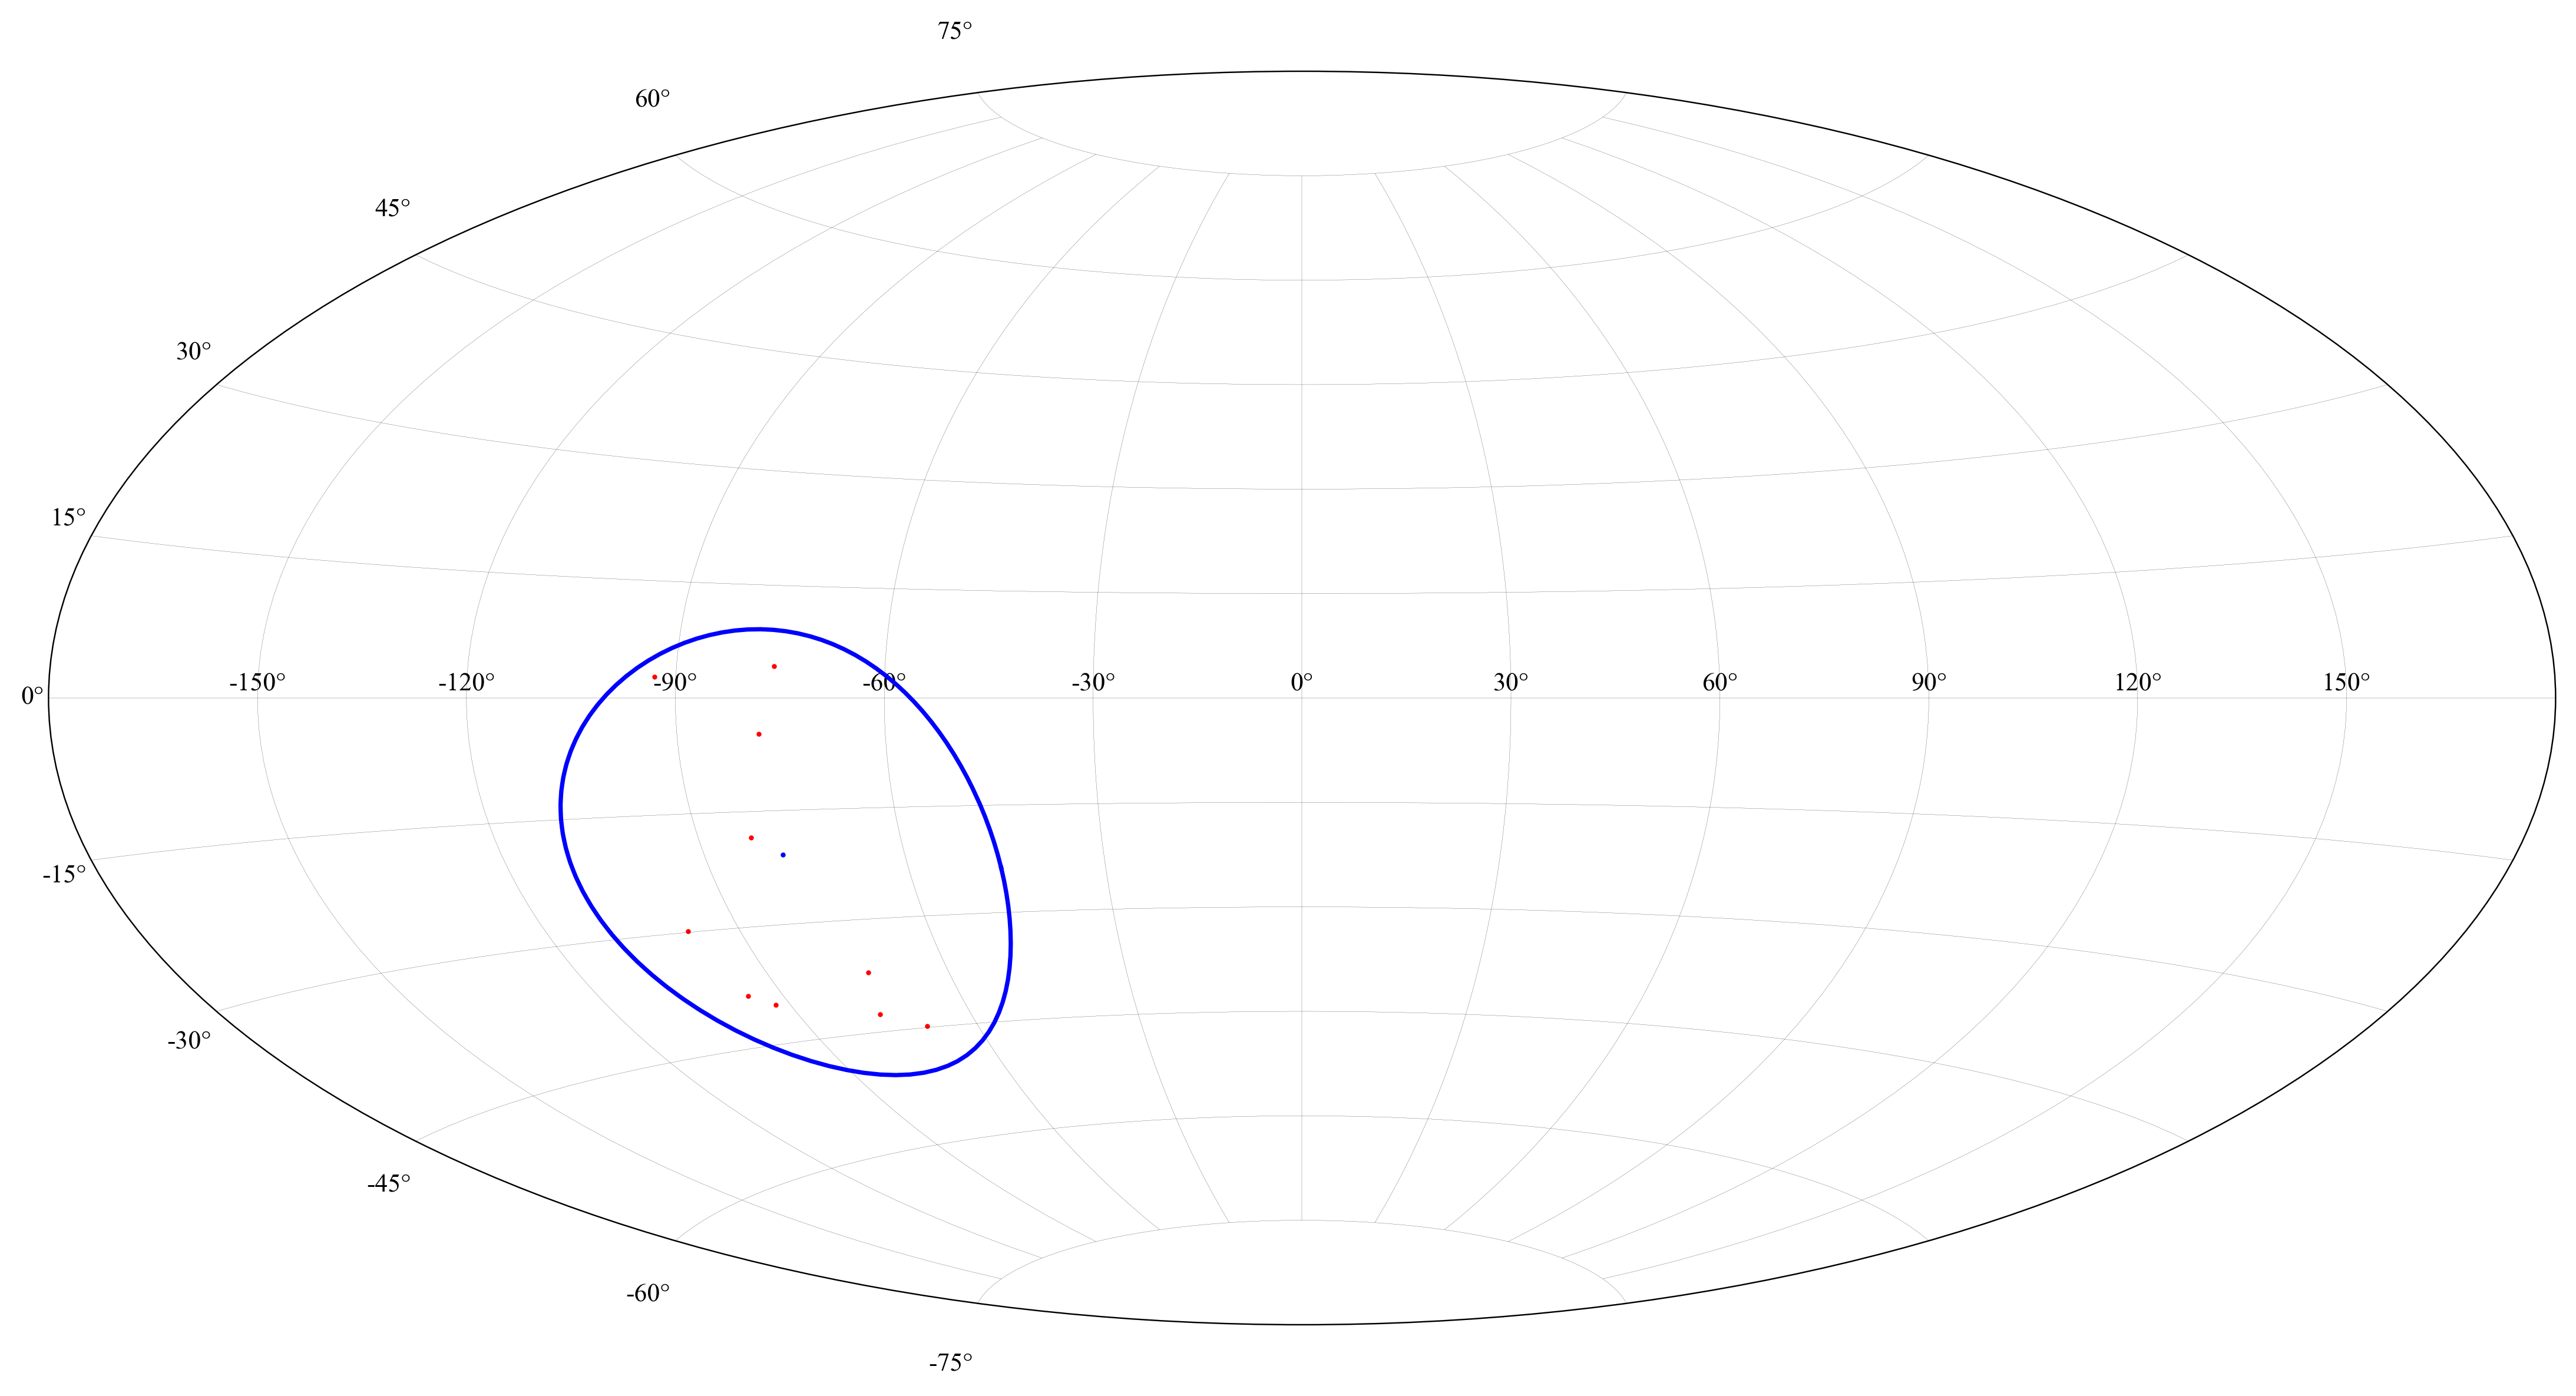

In [5]:
scale = 10
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1, projection="aitoff")

# 
alpha_list = []
delta_list = []
for s in s_list:
    alpha, delta = vec2equatorial(s)
    alpha_list.append(alpha)
    delta_list.append(delta)
ax.scatter(
    alpha_list, delta_list,
    s=3, linewidths=1.0e-10,
    marker='o', color='red')
# 
alpha_c, delta_c = vec2equatorial(center_vec)
ax.scatter(
    alpha_c, delta_c,
    s=3, linewidths=1.0e-10,
    marker='o', color='blue')
# 
alpha_o_list = []
delta_o_list = []
for phi in np.linspace(0, 2*np.pi, 100):
    edge = np.array([
        np.sin(theta_FOV)*np.cos(phi),
        np.sin(theta_FOV)*np.sin(phi),
        np.cos(theta_FOV)])
    edge_c = convert_z_axis(edge[np.newaxis, :], center_vec)[0]
    alpha, delta = vec2equatorial(edge_c)
    alpha_o_list.append(alpha)
    delta_o_list.append(delta)
ax.plot(alpha_o_list, delta_o_list, color='blue')
plt.show()

# scale = 10
# fig = plt.figure(figsize=(scale*1.6, scale))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(alpha_o_list)
# ax.plot(delta_o_list)
# plt.show()

## add observe noise

In [6]:
kappa = rand.estimate_kappa_von_mises_fisher_3d(theta_img, kappa_alpha)
theta_sampling = rand.estimate_thata_von_mises_fisher_3d(
    kappa, kappa_alpha_sampling)

print(f'kappa_alpha          : {kappa_alpha}')
print(f'kappa_alpha_sampling : {kappa_alpha_sampling}')
print(f'kappa                : {kappa}')
print(f'theta_img            : {theta_img}')
print(f'theta_sampling       : {theta_sampling}')

kappa_alpha          : 0.99
kappa_alpha_sampling : 0.999999
kappa                : 9657742.661506133
theta_img            : 0.0009765625
theta_sampling       : 0.001691455141610275


In [7]:
s_hat_list = []
for s in s_list:
    s_hat = rand.von_mises_fisher_3d_sampling(s, kappa, seed=100)
    s_hat_list.append(s_hat)

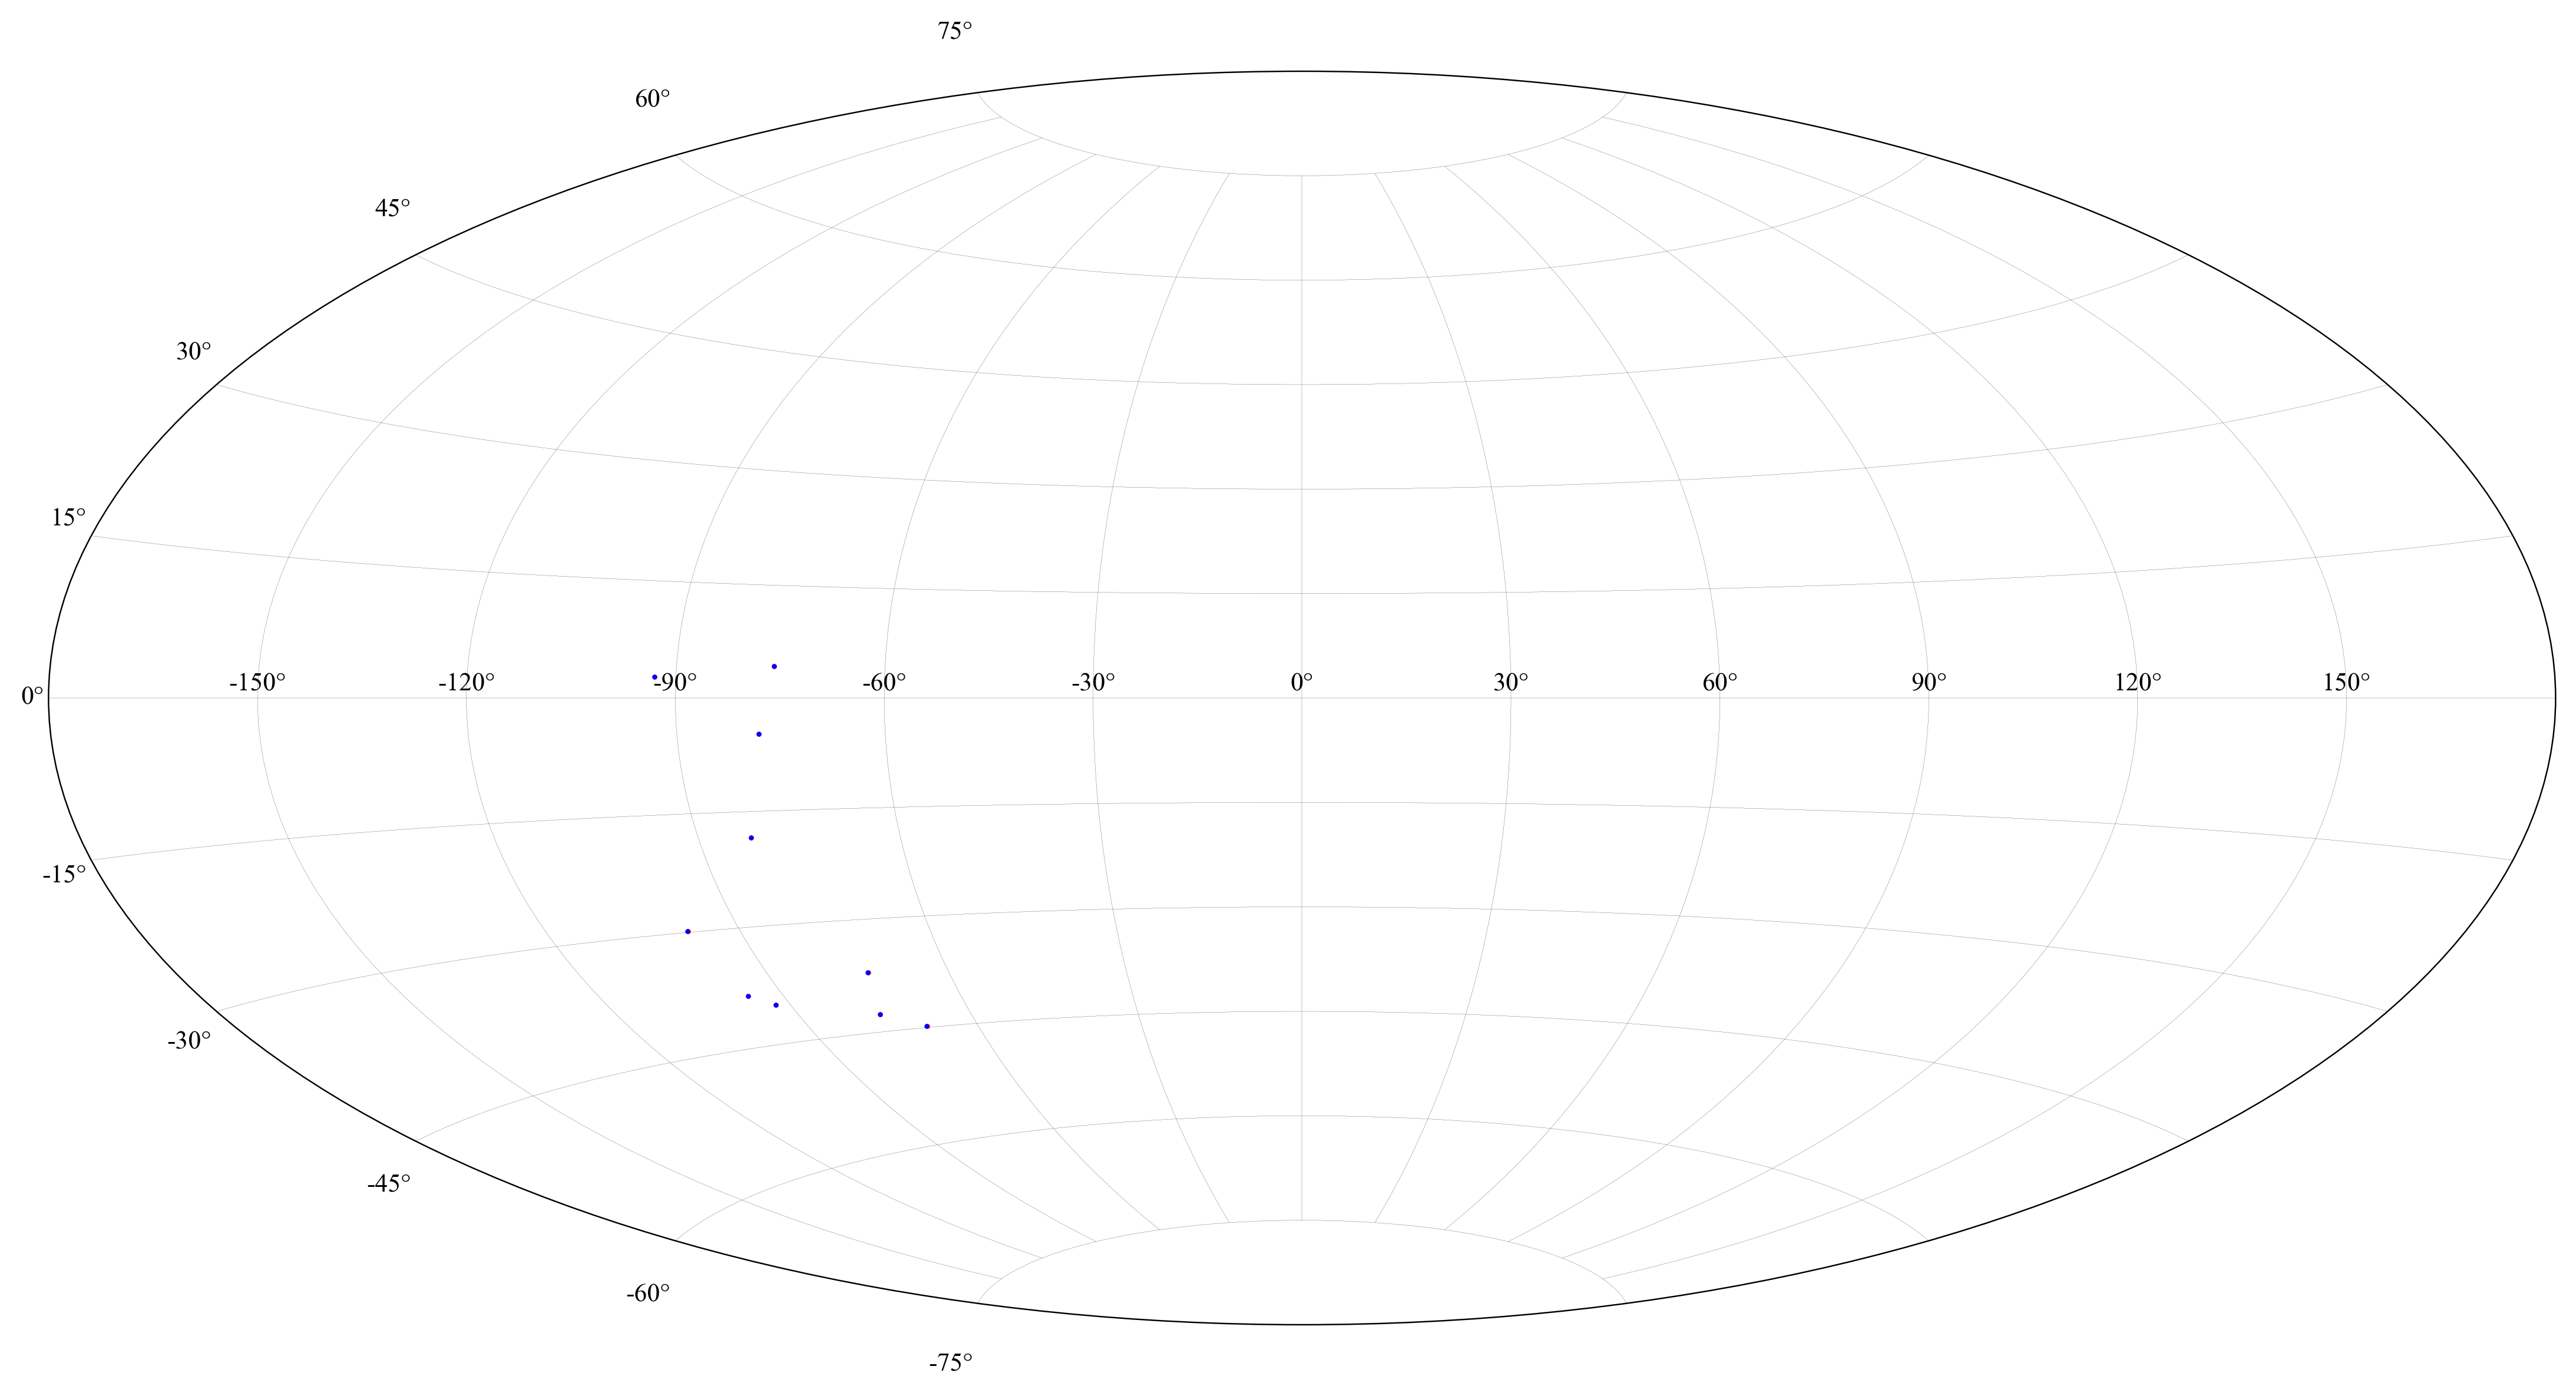

In [8]:
scale = 10
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1, projection="aitoff")

# 
alpha_list = []
delta_list = []
for s in s_list:
    alpha, delta = vec2equatorial(s)
    alpha_list.append(alpha)
    delta_list.append(delta)
ax.scatter(
    alpha_list, delta_list,
    s=3, linewidths=1.0e-10,
    marker='o', color='red')
# 
alpha_list = []
delta_list = []
for s_hat in s_hat_list:
    alpha, delta = vec2equatorial(s_hat)
    alpha_list.append(alpha)
    delta_list.append(delta)
ax.scatter(
    alpha_list, delta_list,
    s=3, linewidths=1.0e-10,
    marker='o', color='blue')

In [9]:
s_hat_list = []
for s in s_list:
    s_hat = rand.uniform_limited_spherical_vector(s, theta_sampling, seed=100)
    s_hat_list.append(s_hat)

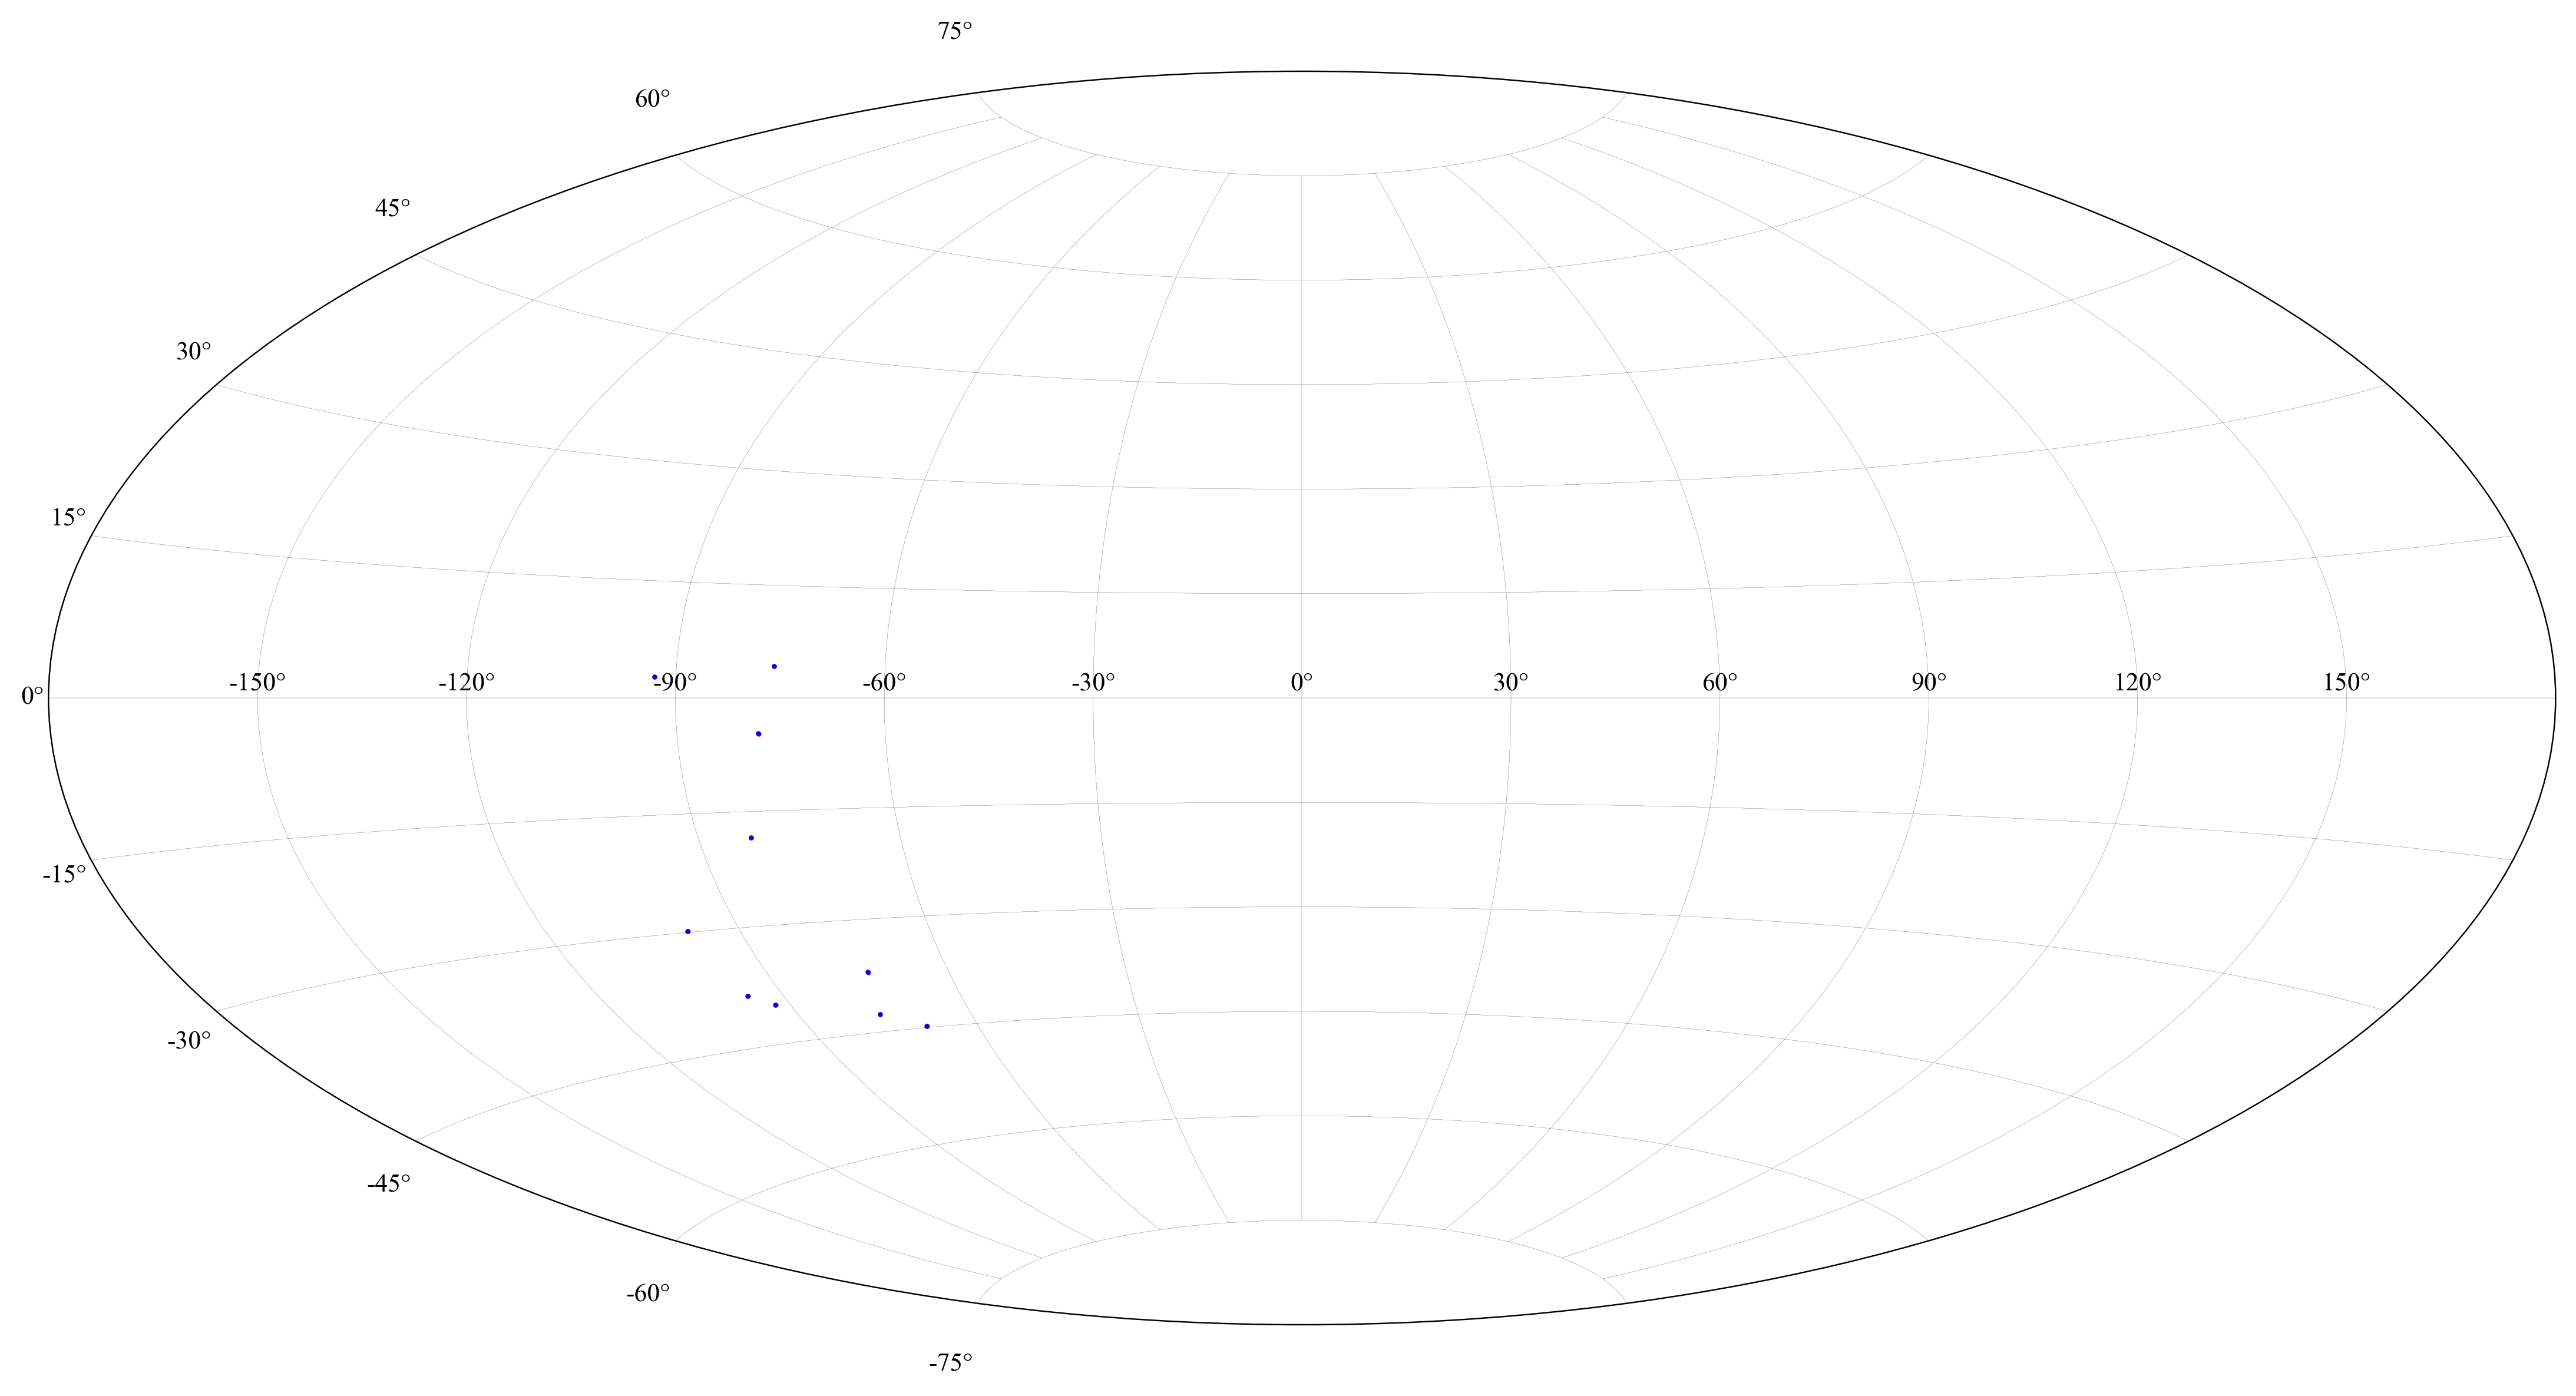

In [10]:
scale = 10
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1, projection="aitoff")

# 
alpha_list = []
delta_list = []
for s in s_list:
    alpha, delta = vec2equatorial(s)
    alpha_list.append(alpha)
    delta_list.append(delta)
ax.scatter(
    alpha_list, delta_list,
    s=3, linewidths=1.0e-10,
    marker='o', color='red')
# 
alpha_list = []
delta_list = []
for s_hat in s_hat_list:
    alpha, delta = vec2equatorial(s_hat)
    alpha_list.append(alpha)
    delta_list.append(delta)
ax.scatter(
    alpha_list, delta_list,
    s=3, linewidths=1.0e-10,
    marker='o', color='blue')